# Trening data Preprocessing

In [1]:
# importing labararies
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing datas
train = pd.read_csv(r"D:\EKEEDA\Data\Capstone Projects\train.csv")
test  = pd.read_csv(r"D:\EKEEDA\Data\Capstone Projects\test.csv")

In [3]:
train.head(10)

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN
5,7,4.36,4.91,4.48,NaN,NaN,NaN,NaN,NaN
6,8,3.74,3.71,3.76,NaN,NaN,NaN,NaN,NaN
7,9,7.70,3.75,3.60,NaN,NaN,NaN,NaN,NaN
8,10,3.34,2.13,5.40,NaN,NaN,NaN,NaN,NaN
9,11,3.96,2.24,4.22,NaN,NaN,NaN,NaN,NaN


In [4]:
train.shape

(147, 9)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [6]:
train.describe()

,Id,target,1,2,3,4,5,6,7
count,147.000000,147.000000,145.000000,145.000000,32.000000,31.000000,33.000000,37.000000,37.000000
mean,101.401361,5.021633,4.972621,4.906552,4.665000,5.871613,8.678788,3.883784,3.957568
std,64.836640,2.122535,2.044076,2.001357,2.057429,2.555247,5.299119,1.615455,1.916953
min,0.000000,1.300000,0.900000,1.040000,2.040000,2.480000,2.880000,1.000000,1.600000
25%,41.500000,3.720000,3.500000,3.400000,3.325000,4.445000,5.840000,2.900000,2.900000
50%,102.000000,4.600000,4.800000,4.830000,4.150000,5.500000,7.300000,3.400000,3.500000
75%,158.500000,6.275000,6.450000,6.200000,5.970000,6.400000,8.420000,4.800000,4.400000
max,214.000000,11.700000,10.900000,11.000000,10.660000,14.790000,27.120000,8.540000,10.370000


In [7]:
# Id columns is set to the index
train.set_index('Id',inplace=True)

In [8]:
train.head(10)

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN
7,4.36,4.91,4.48,NaN,NaN,NaN,NaN,NaN
8,3.74,3.71,3.76,NaN,NaN,NaN,NaN,NaN
9,7.70,3.75,3.60,NaN,NaN,NaN,NaN,NaN
10,3.34,2.13,5.40,NaN,NaN,NaN,NaN,NaN


In [9]:
train['target'].value_counts()

4.70     6
4.20     4
4.60     4
5.60     4
3.90     4
        ..
11.70    1
6.90     1
4.85     1
4.23     1
3.10     1
Name: target, Length: 97, dtype: int64

In [10]:
train['target'] = np.where(train['target'] >5,1,0)

In [11]:
# imbalencing chacking
train['target'].value_counts()/len(train)*100

0    59.863946
1    40.136054
Name: target, dtype: float64

In [12]:
train.head(10)

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,1,4.80,5.85,NaN,NaN,NaN,NaN,NaN
3,0,5.88,6.84,NaN,NaN,NaN,NaN,NaN
4,0,3.20,2.70,NaN,NaN,NaN,NaN,NaN
5,1,7.70,7.06,NaN,NaN,NaN,NaN,NaN
6,0,5.50,5.30,NaN,NaN,NaN,NaN,NaN
7,0,4.91,4.48,NaN,NaN,NaN,NaN,NaN
8,0,3.71,3.76,NaN,NaN,NaN,NaN,NaN
9,1,3.75,3.60,NaN,NaN,NaN,NaN,NaN
10,0,2.13,5.40,NaN,NaN,NaN,NaN,NaN


In [13]:
# missing values 
train.isnull().mean()*100

target     0.000000
1          1.360544
2          1.360544
3         78.231293
4         78.911565
5         77.551020
6         74.829932
7         74.829932
dtype: float64

In [14]:
# missing values imputation
train['1'].fillna(train['1'].mean(),inplace=True)
train['2'].fillna(train['2'].median(),inplace=True)
train['3'].fillna(train['3'].median(),inplace=True)
train['4'].fillna(train['4'].median(),inplace=True)
train['5'].fillna(train['5'].median(),inplace=True)
train['6'].fillna(train['6'].median(),inplace=True)
train['7'].fillna(train['7'].median(),inplace=True)

In [15]:
train.isnull().sum()

target    0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
dtype: int64

In [16]:
# chacking duplicated 
train.duplicated().sum()

0

In [17]:
train.head(10)

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,1,4.80,5.85,4.15,5.5,7.3,3.4,3.5
3,0,5.88,6.84,4.15,5.5,7.3,3.4,3.5
4,0,3.20,2.70,4.15,5.5,7.3,3.4,3.5
5,1,7.70,7.06,4.15,5.5,7.3,3.4,3.5
6,0,5.50,5.30,4.15,5.5,7.3,3.4,3.5
7,0,4.91,4.48,4.15,5.5,7.3,3.4,3.5
8,0,3.71,3.76,4.15,5.5,7.3,3.4,3.5
9,1,3.75,3.60,4.15,5.5,7.3,3.4,3.5
10,0,2.13,5.40,4.15,5.5,7.3,3.4,3.5


<AxesSubplot: xlabel='Id'>

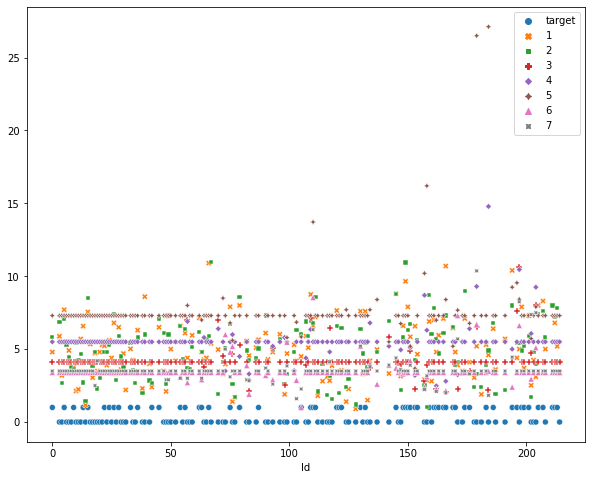

In [18]:
# scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=train ,color= 'green')

<AxesSubplot: >

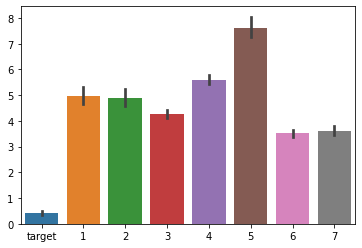

In [19]:
# bar plot
sns.barplot(data = train)

<AxesSubplot: >

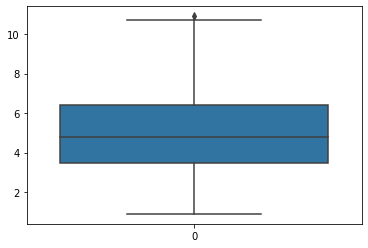

In [20]:
# outlier chacking
sns.boxplot(data=train['1'])

<AxesSubplot: >

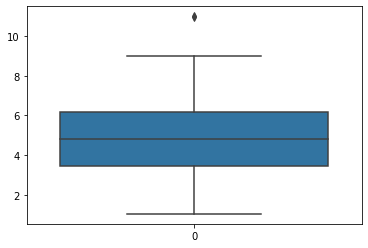

In [21]:
sns.boxplot(data=train['2'])

<AxesSubplot: >

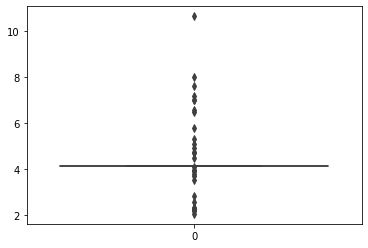

In [22]:
sns.boxplot(data=train['3'])

<AxesSubplot: >

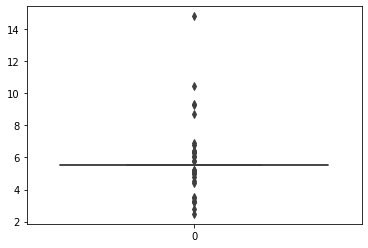

In [23]:
sns.boxplot(data=train['4'])

<AxesSubplot: >

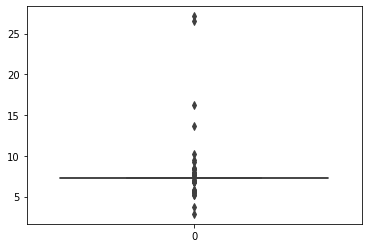

In [24]:
sns.boxplot(data=train['5'])

<AxesSubplot: >

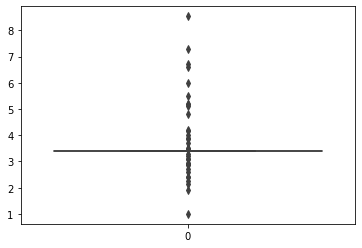

In [25]:
sns.boxplot(data=train['6'])

<AxesSubplot: >

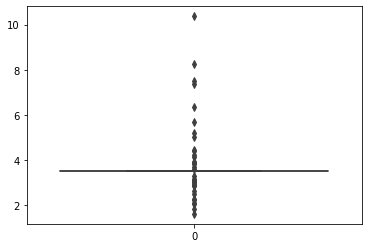

In [26]:
sns.boxplot(data=train['7'])

<AxesSubplot: xlabel='Id', ylabel='1'>

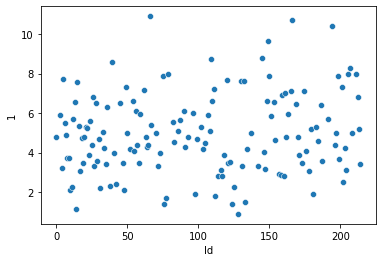

In [27]:
sns.scatterplot(data= train['1'])

<AxesSubplot: xlabel='Id', ylabel='2'>

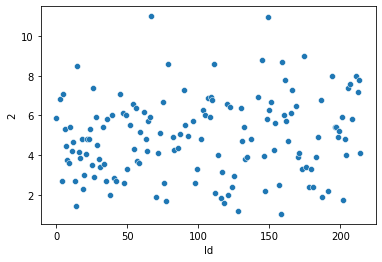

In [28]:
sns.scatterplot(data= train['2'])

<AxesSubplot: xlabel='Id', ylabel='3'>

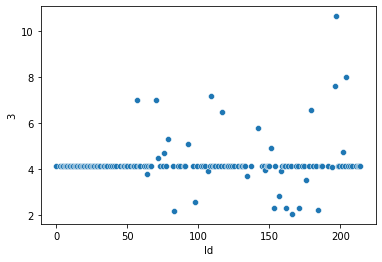

In [29]:
sns.scatterplot(data= train['3'])

<AxesSubplot: xlabel='Id', ylabel='4'>

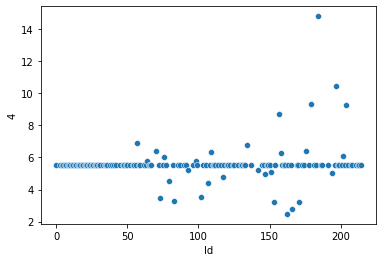

In [30]:
sns.scatterplot(data= train['4'])

<AxesSubplot: xlabel='Id', ylabel='5'>

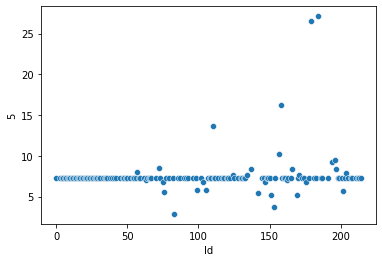

In [31]:
sns.scatterplot(data= train['5'])

<AxesSubplot: xlabel='Id', ylabel='6'>

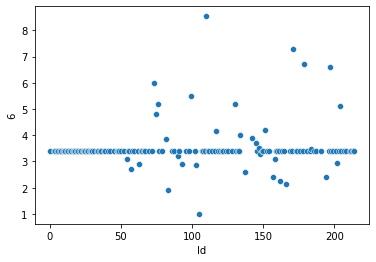

In [32]:
sns.scatterplot(data= train['6'])

<AxesSubplot: xlabel='Id', ylabel='7'>

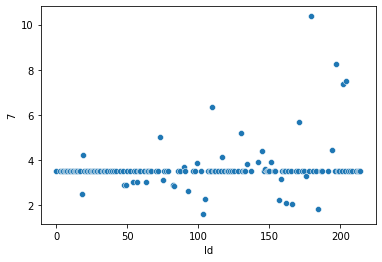

In [33]:
sns.scatterplot(data= train['7'])

<AxesSubplot: >

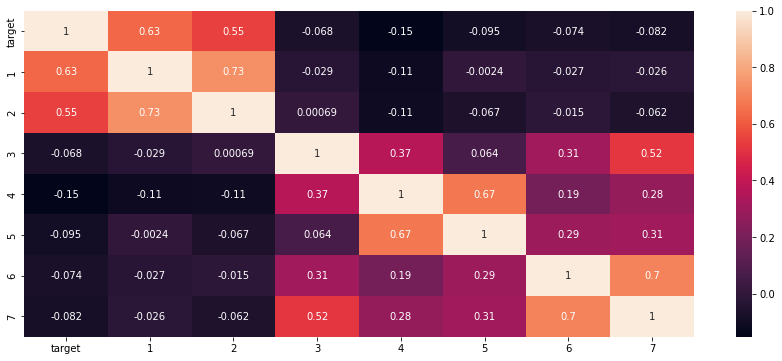

In [34]:
# Heatmap 
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot=True)

In [35]:
train

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,1,4.80,5.85,4.15,5.5,7.3,3.4,3.5
3,0,5.88,6.84,4.15,5.5,7.3,3.4,3.5
4,0,3.20,2.70,4.15,5.5,7.3,3.4,3.5
5,1,7.70,7.06,4.15,5.5,7.3,3.4,3.5
6,0,5.50,5.30,4.15,5.5,7.3,3.4,3.5
...,...,...,...,...,...,...,...,...
208,0,5.00,5.80,4.15,5.5,7.3,3.4,3.5
211,1,8.00,8.00,4.15,5.5,7.3,3.4,3.5
212,1,6.80,7.20,4.15,5.5,7.3,3.4,3.5


In [36]:
numaric_col = ['1','2','3','4','5','6','7']
numaric_col

['1', '2', '3', '4', '5', '6', '7']

In [37]:
train_num = train[numaric_col]

In [38]:
train_num

,1,2,3,4,5,6,7
Id,,,,,,,
0,4.80,5.85,4.15,5.5,7.3,3.4,3.5
3,5.88,6.84,4.15,5.5,7.3,3.4,3.5
4,3.20,2.70,4.15,5.5,7.3,3.4,3.5
5,7.70,7.06,4.15,5.5,7.3,3.4,3.5
6,5.50,5.30,4.15,5.5,7.3,3.4,3.5
...,...,...,...,...,...,...,...
208,5.00,5.80,4.15,5.5,7.3,3.4,3.5
211,8.00,8.00,4.15,5.5,7.3,3.4,3.5
212,6.80,7.20,4.15,5.5,7.3,3.4,3.5


In [39]:
train_target = train['target']
train_target

Id
0      1
3      0
4      0
5      1
6      0
      ..
208    0
211    1
212    1
213    1
214    0
Name: target, Length: 147, dtype: int32

In [40]:
# Outlier Detetion 

from sklearn.covariance import EllipticEnvelope
model_tr = EllipticEnvelope(contamination=0.05)
model_tr.fit(train_num)
train_num['outlier_score'] = model_tr.predict(train_num)
ee_index =list(train_num[train_num['outlier_score']==-1].index)

In [41]:
len(ee_index)

8

In [42]:
train_num.drop(columns='outlier_score',inplace=True)

In [43]:
train_num.drop(ee_index,inplace=True)

In [44]:
train_num

,1,2,3,4,5,6,7
Id,,,,,,,
0,4.80,5.85,4.15,5.5,7.3,3.4,3.5
3,5.88,6.84,4.15,5.5,7.3,3.4,3.5
4,3.20,2.70,4.15,5.5,7.3,3.4,3.5
5,7.70,7.06,4.15,5.5,7.3,3.4,3.5
6,5.50,5.30,4.15,5.5,7.3,3.4,3.5
...,...,...,...,...,...,...,...
208,5.00,5.80,4.15,5.5,7.3,3.4,3.5
211,8.00,8.00,4.15,5.5,7.3,3.4,3.5
212,6.80,7.20,4.15,5.5,7.3,3.4,3.5


In [45]:
# standerdisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_std = sc.fit_transform(train_num)

In [46]:
train_std

array([[-6.81032167e-02,  4.73455867e-01, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [ 4.76715508e-01,  9.72210073e-01, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [-8.75242069e-01, -1.11348933e+00, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [ 1.39483595e+00,  1.08304434e+00, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [ 2.85020031e-01,  1.96370197e-01, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [-1.26124206e-02, -2.16739347e-01, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.66217902e-02],
       [-6.17966560e-01, -5.79469678e-01, -7.80674206e-02,
         8.06055359e-02,  3.85700249e-02, -1.20624244e-01,
        -7.6621790

In [47]:
train_df = pd.DataFrame(train_std , columns=numaric_col, index = train_num.index)

In [48]:
train_df

,1,2,3,4,5,6,7
Id,,,,,,,
0,-0.068103,0.473456,-0.078067,0.080606,0.03857,-0.120624,-0.076622
3,0.476716,0.972210,-0.078067,0.080606,0.03857,-0.120624,-0.076622
4,-0.875242,-1.113489,-0.078067,0.080606,0.03857,-0.120624,-0.076622
5,1.394836,1.083044,-0.078067,0.080606,0.03857,-0.120624,-0.076622
6,0.285020,0.196370,-0.078067,0.080606,0.03857,-0.120624,-0.076622
...,...,...,...,...,...,...,...
208,0.032789,0.448266,-0.078067,0.080606,0.03857,-0.120624,-0.076622
211,1.546174,1.556609,-0.078067,0.080606,0.03857,-0.120624,-0.076622
212,0.940820,1.153575,-0.078067,0.080606,0.03857,-0.120624,-0.076622


In [49]:
train_1 = train_df.merge(train_target,on='Id',how='inner')
train_1

,1,2,3,4,5,6,7,target
Id,,,,,,,,
0,-0.068103,0.473456,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
3,0.476716,0.972210,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
4,-0.875242,-1.113489,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
5,1.394836,1.083044,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
6,0.285020,0.196370,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
...,...,...,...,...,...,...,...,...
208,0.032789,0.448266,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
211,1.546174,1.556609,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
212,0.940820,1.153575,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1


# Testing data preprocessing

In [50]:
test

,Id,1,2,3,4,5,6,7
0,1,6.80,5.40,NaN,NaN,NaN,NaN,NaN
1,2,4.71,4.20,NaN,NaN,NaN,NaN,NaN
2,32,2.10,3.40,NaN,NaN,NaN,NaN,NaN
3,40,5.35,5.85,NaN,NaN,NaN,NaN,NaN
4,43,4.80,5.30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58,206,5.80,6.60,1.75,5.3,15.1,4.6,15.6
59,209,3.68,4.85,NaN,NaN,NaN,NaN,NaN
60,210,7.50,4.80,NaN,NaN,NaN,NaN,NaN
61,215,8.00,6.80,NaN,NaN,NaN,NaN,NaN


In [51]:
test.shape

(63, 8)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [53]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,63.0,124.968254,55.778643,1.00,84.5000,126.000,176.0000,216.00
1,63.0,5.223651,1.906450,0.62,3.9750,4.800,6.4000,9.80
2,63.0,5.051429,1.739643,0.63,4.0000,4.800,6.0500,11.10
3,15.0,4.439333,2.060931,1.75,3.4500,4.050,4.7200,9.59
4,15.0,6.046667,2.221575,2.62,4.8800,6.060,6.7000,11.60
5,16.0,7.562500,4.526378,3.30,4.4625,5.735,9.3875,18.50
6,14.0,4.198571,1.709340,2.43,2.8625,4.300,4.6750,9.20
7,14.0,5.190714,4.079520,1.30,2.9250,4.215,5.2600,15.60


In [54]:
# missing values
test.isnull().sum()

Id     0
1      0
2      0
3     48
4     48
5     47
6     49
7     49
dtype: int64

In [55]:
# missing values inputations
test['1'].fillna(test['1'].mean(),inplace=True)
test['2'].fillna(test['2'].median(),inplace=True)
test['3'].fillna(test['3'].mean(),inplace=True)
test['4'].fillna(test['4'].median(),inplace=True)
test['5'].fillna(test['5'].mean(),inplace=True)
test['6'].fillna(test['6'].median(),inplace=True)
test['7'].fillna(test['7'].mean(),inplace=True)

In [56]:
test

,Id,1,2,3,4,5,6,7
0,1,6.80,5.40,4.439333,6.06,7.5625,4.3,5.190714
1,2,4.71,4.20,4.439333,6.06,7.5625,4.3,5.190714
2,32,2.10,3.40,4.439333,6.06,7.5625,4.3,5.190714
3,40,5.35,5.85,4.439333,6.06,7.5625,4.3,5.190714
4,43,4.80,5.30,4.439333,6.06,7.5625,4.3,5.190714
...,...,...,...,...,...,...,...,...
58,206,5.80,6.60,1.750000,5.30,15.1000,4.6,15.600000
59,209,3.68,4.85,4.439333,6.06,7.5625,4.3,5.190714
60,210,7.50,4.80,4.439333,6.06,7.5625,4.3,5.190714
61,215,8.00,6.80,4.439333,6.06,7.5625,4.3,5.190714


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       63 non-null     float64
 4   4       63 non-null     float64
 5   5       63 non-null     float64
 6   6       63 non-null     float64
 7   7       63 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [58]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,63.0,124.968254,55.778643,1.00,84.500000,126.000000,176.000000,216.00
1,63.0,5.223651,1.906450,0.62,3.975000,4.800000,6.400000,9.80
2,63.0,5.051429,1.739643,0.63,4.000000,4.800000,6.050000,11.10
3,63.0,4.439333,0.979336,1.75,4.439333,4.439333,4.439333,9.59
4,63.0,6.056825,1.055688,2.62,6.060000,6.060000,6.060000,11.60
5,63.0,7.562500,2.226387,3.30,7.562500,7.562500,7.562500,18.50
6,63.0,4.277460,0.783870,2.43,4.300000,4.300000,4.300000,9.20
7,63.0,5.190714,1.868035,1.30,5.190714,5.190714,5.190714,15.60


In [59]:
test.duplicated().sum()

0

In [60]:
test.isnull().sum()

Id    0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
dtype: int64

In [61]:
test.set_index('Id',inplace=True)

In [62]:
test.head(4)

,1,2,3,4,5,6,7
Id,,,,,,,
1,6.80,5.40,4.439333,6.06,7.5625,4.3,5.190714
2,4.71,4.20,4.439333,6.06,7.5625,4.3,5.190714
32,2.10,3.40,4.439333,6.06,7.5625,4.3,5.190714
40,5.35,5.85,4.439333,6.06,7.5625,4.3,5.190714


<AxesSubplot: xlabel='1'>

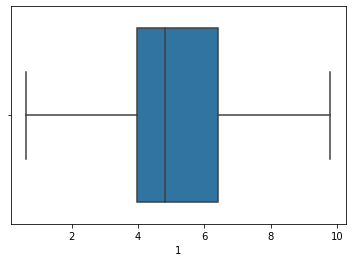

In [63]:
# boxplot
sns.boxplot(data=test,x='1')

<AxesSubplot: xlabel='2'>

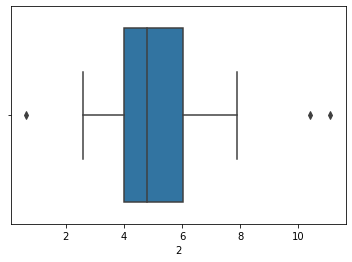

In [64]:
sns.boxplot(data=test,x='2')

<AxesSubplot: xlabel='3'>

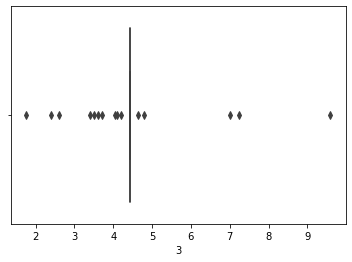

In [65]:
sns.boxplot(data=test,x='3')

<AxesSubplot: xlabel='4'>

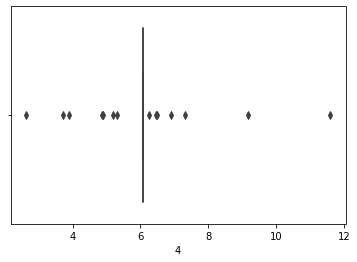

In [66]:
sns.boxplot(data=test,x='4')

<AxesSubplot: xlabel='5'>

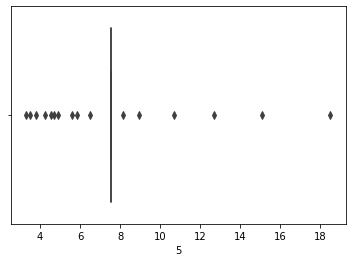

In [67]:
sns.boxplot(data=test,x='5')

<AxesSubplot: xlabel='6'>

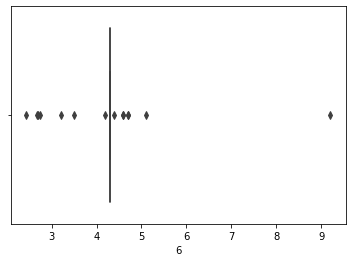

In [68]:
sns.boxplot(data=test,x='6')

<AxesSubplot: xlabel='7'>

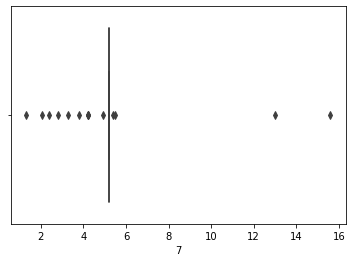

In [69]:
sns.boxplot(data=test,x='7')

<AxesSubplot: xlabel='1', ylabel='Count'>

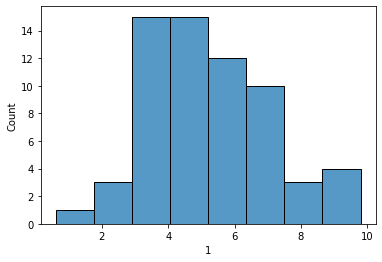

In [70]:
sns.histplot(data=test,x='1')

<AxesSubplot: >

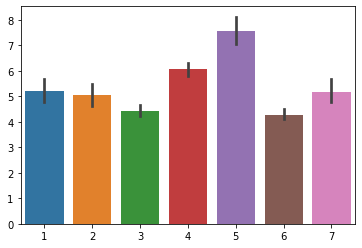

In [71]:
sns.barplot(data=test)

In [72]:
numaric_c = ['1','2','3','4','5','6','7']


In [73]:
test_num = test[numaric_c]
test_num

,1,2,3,4,5,6,7
Id,,,,,,,
1,6.80,5.40,4.439333,6.06,7.5625,4.3,5.190714
2,4.71,4.20,4.439333,6.06,7.5625,4.3,5.190714
32,2.10,3.40,4.439333,6.06,7.5625,4.3,5.190714
40,5.35,5.85,4.439333,6.06,7.5625,4.3,5.190714
43,4.80,5.30,4.439333,6.06,7.5625,4.3,5.190714
...,...,...,...,...,...,...,...
206,5.80,6.60,1.750000,5.30,15.1000,4.6,15.600000
209,3.68,4.85,4.439333,6.06,7.5625,4.3,5.190714
210,7.50,4.80,4.439333,6.06,7.5625,4.3,5.190714


In [74]:
# outlier detection 

from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.05)
model.fit(test_num)


EllipticEnvelope(contamination=0.05)

In [75]:
test['outlier_score'] = model.predict(test_num)

In [76]:
ee_index =list(test[test['outlier_score']==-1].index)

In [77]:
len(ee_index)

4

In [78]:
test.drop(ee_index,inplace=True)
del test['outlier_score']

In [79]:
test.shape

(59, 7)

In [80]:
# sandarddisation 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_std = sc.fit_transform(test_num)
test_std

array([[ 8.33491901e-01,  2.01978943e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [-2.71591964e-01, -4.93358401e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [-1.65162492e+00, -9.56916629e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [ 6.68069231e-02,  4.62730446e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [-2.24004620e-01,  1.44034164e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [-4.09066511e-01, -7.83082294e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.43784144e-15],
       [ 1.09106784e-01, -3.94852277e-01,  2.74261183e-15,
         3.03129602e-03,  0.00000000e+00,  2.89853412e-02,
        -1.4378414

In [81]:
test_df = pd.DataFrame(test_std,columns=numaric_c ,index=test_num.index)

In [82]:
test_df 

,1,2,3,4,5,6,7
Id,,,,,,,
1,0.833492,0.201979,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
2,-0.271592,-0.493358,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
32,-1.651625,-0.956917,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
40,0.066807,0.462730,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
43,-0.224005,0.144034,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
...,...,...,...,...,...,...,...
206,0.304744,0.897316,-2.768137e+00,-0.722661,3.412724,0.414776,5.617078e+00
209,-0.816203,-0.116717,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15
210,1.203616,-0.145690,2.742612e-15,0.003031,0.000000,0.028985,-1.437841e-15


In [83]:
# Both coloumns TRAIN_1 & TEST_DF
train_1.shape

(139, 8)

In [84]:
test_df.shape

(63, 7)

## Model appyling

In [85]:
train_1 

,1,2,3,4,5,6,7,target
Id,,,,,,,,
0,-0.068103,0.473456,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
3,0.476716,0.972210,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
4,-0.875242,-1.113489,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
5,1.394836,1.083044,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
6,0.285020,0.196370,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
...,...,...,...,...,...,...,...,...
208,0.032789,0.448266,-0.078067,0.080606,0.03857,-0.120624,-0.076622,0
211,1.546174,1.556609,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1
212,0.940820,1.153575,-0.078067,0.080606,0.03857,-0.120624,-0.076622,1


In [86]:
x = train_1.drop(columns=['target'])
y = train_1['target']

In [87]:
x

,1,2,3,4,5,6,7
Id,,,,,,,
0,-0.068103,0.473456,-0.078067,0.080606,0.03857,-0.120624,-0.076622
3,0.476716,0.972210,-0.078067,0.080606,0.03857,-0.120624,-0.076622
4,-0.875242,-1.113489,-0.078067,0.080606,0.03857,-0.120624,-0.076622
5,1.394836,1.083044,-0.078067,0.080606,0.03857,-0.120624,-0.076622
6,0.285020,0.196370,-0.078067,0.080606,0.03857,-0.120624,-0.076622
...,...,...,...,...,...,...,...
208,0.032789,0.448266,-0.078067,0.080606,0.03857,-0.120624,-0.076622
211,1.546174,1.556609,-0.078067,0.080606,0.03857,-0.120624,-0.076622
212,0.940820,1.153575,-0.078067,0.080606,0.03857,-0.120624,-0.076622


In [88]:
y

Id
0      1
3      0
4      0
5      1
6      0
      ..
208    0
211    1
212    1
213    1
214    0
Name: target, Length: 139, dtype: int32

In [89]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
x_train.shape , x_test.shape

((111, 7), (28, 7))

In [91]:
y_train.shape , y_test.shape

((111,), (28,))

In [92]:
# naiye_bayes
# random forest
# KNN 
# XGBoost

#### 1.Naiye bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [94]:
y_pred = nb.predict(x_test)

In [95]:
# predictions of train dataset
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0])

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

In [97]:
metric_df = pd.DataFrame(columns=['Model','accuracy','precision','recall','fi_score'])
metric_df

,Model,accuracy,precision,recall,fi_score


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


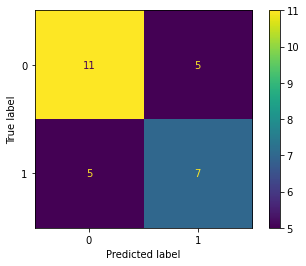

In [98]:
metrics.plot_confusion_matrix(nb,x_test,y_test)

In [99]:
print('Accuracy_score:',metrics.accuracy_score(y_test,y_pred))
print('Precision_score:',metrics.precision_score(y_test,y_pred))
print('Recall_score:',metrics.recall_score(y_test,y_pred))
print('F1_score:',metrics.f1_score(y_test,y_pred))

Accuracy_score: 0.6428571428571429
Precision_score: 0.5833333333333334
Recall_score: 0.5833333333333334
F1_score: 0.5833333333333334


In [100]:
metric_df.loc[len(metric_df)] = (['Naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333


#### 1 naiye bayes prediction of test dataset

In [101]:
y_pred = nb.predict(test_df)

In [102]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

#### 2.KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5,p=2)
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0])

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


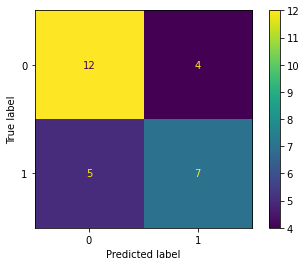

In [105]:
metrics.plot_confusion_matrix(kn,x_test,y_test)

In [106]:
print('Accuracy_score:',metrics.accuracy_score(y_test,y_pred))
print('precision_score:',metrics.precision_score(y_test,y_pred))
print('recall_score:',metrics.recall_score(y_test,y_pred))
print('f1_score:',metrics.f1_score(y_test,y_pred))

Accuracy_score: 0.6785714285714286
precision_score: 0.6363636363636364
recall_score: 0.5833333333333334
f1_score: 0.6086956521739131


In [107]:
metric_df.loc[len(metric_df)] = (['knn:',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)
                                 ,metrics.f1_score(y_test,y_pred)])    
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333
1,knn:,0.678571,0.636364,0.583333,0.608696


#### 2.KNN predict of test dataset

In [108]:
y_pred = kn.predict(test_df)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

#### Haperparametr tunnig on KNN

In [109]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(x_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [110]:
knn_gs = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11, weights= 'distance')

In [111]:
knn_gs.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [112]:
y_gs_pred = knn_gs.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


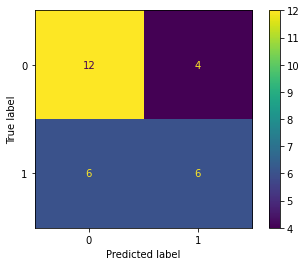

In [113]:
from sklearn import metrics
metrics.plot_confusion_matrix(knn_gs,x_test,y_test)

In [114]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("F1_score : ",metrics.f1_score(y_test,y_gs_pred))

Accuracy :  0.6428571428571429
Precision :  0.6
Recall :  0.5
F1_score :  0.5454545454545454


In [115]:
metric_df.loc[len(metric_df)] = (['KNN_HP_tuning:',metrics.accuracy_score(y_test,y_gs_pred)
                                  ,metrics.precision_score(y_test,y_gs_pred),metrics.recall_score(y_test,y_gs_pred)
                                 ,metrics.f1_score(y_test,y_gs_pred)])
                                 
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333
1,knn:,0.678571,0.636364,0.583333,0.608696
2,KNN_HP_tuning:,0.642857,0.600000,0.500000,0.545455


#### 3.Random forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0])

In [118]:
print('Accuracy_score:',metrics.accuracy_score(y_test,y_pred))
print('precision_score:',metrics.precision_score(y_test,y_pred))
print('recall_score:',metrics.recall_score(y_test,y_pred))
print('f1_score:',metrics.f1_score(y_test,y_pred))

Accuracy_score: 0.6785714285714286
precision_score: 0.6363636363636364
recall_score: 0.5833333333333334
f1_score: 0.6086956521739131


In [119]:
metric_df.loc[len(metric_df)] = (['R_forest:',metrics.accuracy_score(y_test,y_pred)
                                  ,metrics.precision_score(y_test,y_pred)
                                 ,metrics.recall_score(y_test,y_pred)
                                ,metrics.f1_score(y_test,y_pred)])
                                 
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333
1,knn:,0.678571,0.636364,0.583333,0.608696
2,KNN_HP_tuning:,0.642857,0.600000,0.500000,0.545455
3,R_forest:,0.678571,0.636364,0.583333,0.608696


#### 3.Randon forest prediction on test dataset 

In [120]:
y_pred = rf.predict(test_df)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

#### 3.Haperparametr tunnig on Random forest

In [122]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state':[42]}

rf_gs = RandomizedSearchCV(RandomForestClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
rf_gs.fit(x_train, y_train)
rf_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [123]:
rf_gs = RandomForestClassifier(random_state = 42,
 n_estimators = 800,
 min_samples_split = 10,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 110,
 bootstrap = True)

In [127]:
rf_gs.fit(x_train,y_train)
y_gs_pred = rf_gs.predict(x_test)

In [128]:
print("Accuracy : ",accuracy_score(y_test,y_gs_pred))
print("Precision : ",precision_score(y_test,y_gs_pred))
print("Recall : ",recall_score(y_test,y_gs_pred))
print("f1 score : ",f1_score(y_test,y_sgs_pred))

Accuracy :  0.7142857142857143
Precision :  0.7
Recall :  0.5833333333333334
f1 score :  0.6363636363636365


In [129]:
metric_df.loc[len(metric_df)] = (['Rf_HP_tuning:',accuracy_score(y_test,y_gs_pred)
                                  ,precision_score(y_test,y_gs_pred)
                                ,recall_score(y_test,y_gs_pred)
                                ,f1_score(y_test,y_gs_pred)])
                                 
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333
1,knn:,0.678571,0.636364,0.583333,0.608696
2,KNN_HP_tuning:,0.642857,0.600000,0.500000,0.545455
3,R_forest:,0.678571,0.636364,0.583333,0.608696
4,Rf_HP_tuning:,0.714286,0.700000,0.583333,0.636364


#### 4.XGBoost

In [130]:
import xgboost
from xgboost import XGBClassifier

In [131]:
Xgb = XGBClassifier()
Xgb.fit(x_train,y_train)
y_pred = Xgb.predict(x_test)

In [132]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


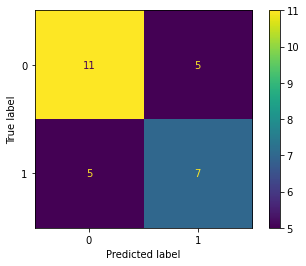

In [137]:
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(Xgb,x_test,y_test)

In [140]:
print('Accuracy :',metrics.accuracy_score(y_pred,y_test))
print('Precision :',metrics.precision_score(y_pred,y_test))
print('Recall :',metrics.recall_score(y_pred,y_test))
print('F1_score :',metrics.f1_score(y_pred,y_test))

Accuracy : 0.6428571428571429
Precision : 0.5833333333333334
Recall : 0.5833333333333334
F1_score : 0.5833333333333334


In [141]:
metric_df.loc[len(metric_df)] = (['XGB :',metrics.accuracy_score(y_pred,y_test)
                                  ,metrics.precision_score(y_pred,y_test)
                               ,metrics.recall_score(y_pred,y_test)
                                ,metrics.f1_score(y_pred,y_test)])
                                 
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.642857,0.583333,0.583333,0.583333
1,knn:,0.678571,0.636364,0.583333,0.608696
2,KNN_HP_tuning:,0.642857,0.600000,0.500000,0.545455
3,R_forest:,0.678571,0.636364,0.583333,0.608696
4,Rf_HP_tuning:,0.714286,0.700000,0.583333,0.636364
5,XGB :,0.642857,0.583333,0.583333,0.583333


#### 4.XGBoost prediction on test dataset

In [143]:
y_pred = Xgb.predict(test_df)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])